# Schema

business.json\
Contains business data including location data, attributes, and categories.

| Column Name     | Description                                                  | Type                    |
|-----------------|--------------------------------------------------------------|-------------------------|
| business_id     | Unique identifier for the business.                          | string (22 characters)  |
| name            | Name of the business.                                        | string                  |
| address         | Full address of the business.                                | string                  |
| city            | City where the business is located.                          | string                  |
| state           | 2 character state code, if applicable.                       | string                  |
| postal code     | Postal code for the business location.                       | string                  |
| latitude        | Latitude of the business location.                           | float                   |
| longitude       | Longitude of the business location.                          | float                   |
| stars           | Star rating of the business, rounded to half-stars.          | float                   |
| review_count    | Number of reviews for the business.                          | integer                 |
| is_open         | Indicates if the business is open or closed.                 | integer (0 or 1)        |
| attributes      | Business attributes and their values.                        | object                  |
| categories      | Categories the business falls under.                         | array of strings        |
| hours           | Operating hours for each day of the week.                    | object                  |


checkin.json\
Checkins on a business.

| Column Name   | Description                                                                 | Type    |
|---------------|-----------------------------------------------------------------------------|---------|
| business_id   | Unique business identifier, maps to business.json.                          | string  |
| date          | Comma-separated list of timestamps for each check-in (YYYY-MM-DD HH:MM:SS). | string  |


review.json\
Contains full review text data including the user_id that wrote the review and the business_id the review is written for.

| Column Name  | Description                                      | Type       |
|--------------|--------------------------------------------------|------------|
| review_id    | Unique review identifier.                        | string     |
| user_id      | Unique user identifier.                          | string     |
| business_id  | Unique business identifier.                      | string     |
| stars        | Star rating given in the review.                 | integer    |
| date         | Date when the review was posted (YYYY-MM-DD).    | string     |
| text         | Content of the review.                           | string     |
| useful       | Number of 'useful' votes received for the review. | integer    |
| funny        | Number of 'funny' votes received for the review. | integer    |
| cool         | Number of 'cool' votes received for the review.  | integer    |


tip.json\
Tips written by a user on a business. Tips are shorter than reviews and tend to convey quick suggestions.

| Column Name       | Description                                           | Type    |
|-------------------|-------------------------------------------------------|---------|
| text              | Text of the tip.                                      | string  |
| date              | Date when the tip was written (YYYY-MM-DD).           | string  |
| compliment_count  | How many compliments the tip has received.            | integer |
| business_id       | Unique business identifier, maps to business.json.    | string  |
| user_id           | Unique user identifier, maps to the user in user.json.| string  |


user.jason\
User data including the user's friend mapping and all the metadata associated with the user.

| Column Name           | Description                                                                 | Type             |
|-----------------------|-----------------------------------------------------------------------------|------------------|
| user_id               | Unique user identifier, maps to the user in user.json.                      | string           |
| name                  | The user's first name.                                                      | string           |
| review_count          | The number of reviews they've written.                                      | integer          |
| yelping_since         | When the user joined Yelp (YYYY-MM-DD).                                     | string           |
| friends               | An array of the user's friends as user_ids.                                 | array of strings |
| useful                | Number of useful votes sent by the user.                                    | integer          |
| funny                 | Number of funny votes sent by the user.                                     | integer          |
| cool                  | Number of cool votes sent by the user.                                      | integer          |
| fans                  | Number of fans the user has.                                                | integer          |
| elite                 | The years the user was elite.                                               | array of integers|
| average_stars         | Average rating of all reviews.                                              | float            |
| compliment_hot        | Number of hot compliments received by the user.                             | integer          |
| compliment_more       | Number of more compliments received by the user.                            | integer          |
| compliment_profile    | Number of profile compliments received by the user.                         | integer          |
| compliment_cute       | Number of cute compliments received by the user.                            | integer          |
| compliment_list       | Number of list compliments received by the user.                            | integer          |
| compliment_note       | Number of note compliments received by the user.                            | integer          |
| compliment_plain      | Number of plain compliments received by the user.                           | integer          |
| compliment_cool       | Number of cool compliments received by the user.                            | integer          |
| compliment_funny      | Number of funny compliments received by the user.                           | integer          |
| compliment_writer     | Number of writer compliments received by the user.                          | integer          |
| compliment_photos     | Number of photo compliments received by the user.                           | integer          |

Source: https://www.yelp.com/dataset/documentation/main

# Topic Modeling and Sentiment Analysis with Spark-NLP & Spark MLlib


**Topic modeling** describes the broad task of assigning topics to unlabeled text documents, it is therefore considered as a clustering task. For our purpose, we implemented a popular technique for topic modeling called Latent Dirichlet Allocation (LDA). LDA is a generative probabalistic model that tries to find groups of words that appear frequently together across different documents.\
-- Reference: Python Machine Learning: Machine Learning and Deep Learning with Python, scikit-learn, and TensorFlow 2, Third Edition

**Spark MLlib** is a scalable machine learning library written in Apache Spark. By leveraging the efficiency of Spark with a suite of fine-tuned machine learning algorithms, MLlib can analyze large amounts of data. It has APIs in Java, Scala, Python and R. In our analysis, we'll specifically focus on Python. [Reference](https://codelabs.developers.google.com/codelabs/spark-nlp#0)

**Spark NLP** is a library created by John Snow Labs for performing efficient natural language processing tasks using Spark. Perhaps most significantly, Spark-NLP extends the capabilities of Spark MLlib by providing components that easily slot into MLlib Pipelines. [Reference](https://codelabs.developers.google.com/codelabs/spark-nlp#0)


In [ ]:
from pyspark.sql import SparkSession
import sparknlp
import pandas as pd

spark.stop()

spark = SparkSession.builder \
    .appName("Spark NLP") \
    .master("local[*]") \
    .config("spark.driver.memory", "16G") \
    .config("spark.serializer", "org.apache.spark.serializer.KryoSerializer") \
    .config("spark.kryoserializer.buffer.max", "2000M") \
    .config("spark.driver.maxResultSize", "0") \
    .config("spark.jars.packages", "com.johnsnowlabs.nlp:spark-nlp_2.12:5.3.3") \
    .getOrCreate()

# Show all columns & rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

24/04/28 16:46:04 INFO SparkEnv: Registering MapOutputTracker
24/04/28 16:46:04 INFO SparkEnv: Registering BlockManagerMaster
24/04/28 16:46:04 INFO SparkEnv: Registering BlockManagerMasterHeartbeat
24/04/28 16:46:04 INFO SparkEnv: Registering OutputCommitCoordinator


In [ ]:
import sparknlp
sparknlp.version()

'5.3.3'

In [ ]:
import pandas as pd
path = "gs://ba-843-olaf/notebooks/jupyter/yelp_dataset/"

# read datasets
df_review = spark.read.json(path+'yelp_academic_dataset_review.json')
df_business = spark.read.json(path+'yelp_academic_dataset_business.json')
df_tip = spark.read.json(path+'yelp_academic_dataset_tip.json')

24/04/28 16:46:49 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [ ]:
df_review.count()

6990280

There are 7 million reviews in total

## Topic modeling - Starbucks Example

In this section, we use Starbucks as an example to demonstrate how to generate insights for businesses by topic modeling, using the review and tip dataset.

### Data Cleaning

We first clean the text by removing special characters using regular expression

In [ ]:
from pyspark.sql.functions import regexp_replace

# remove special characters
df_review = df_review.withColumn('text_clean', regexp_replace(df_review['text'], '\n', ''))
df_review = df_review.withColumn('text_clean', regexp_replace(df_review['text_clean'], '[^\w\s?!]', ''))
df_review.select('text', 'text_clean').limit(10).toPandas()

,text,text_clean
0,"If you decide to eat here, just be aware it is going to take about 2 hours from beginning to end. We have tried it multiple times, because I want to like it! I have been to it's other locations in NJ and never had a bad experience. \n\nThe food is good, but it takes a very long time to come out. The waitstaff is very young, but usually pleasant. We have just had too many experiences where we spent way too long waiting. We usually opt for another diner or restaurant on the weekends, in order to be done quicker.",If you decide to eat here just be aware it is going to take about 2 hours from beginning to end We have tried it multiple times because I want to like it! I have been to its other locations in NJ and never had a bad experience The food is good but it takes a very long time to come out The waitstaff is very young but usually pleasant We have just had too many experiences where we spent way too long waiting We usually opt for another diner or restaurant on the weekends in order to be done quicker
1,"I've taken a lot of spin classes over the years, and nothing compares to the classes at Body Cycle. From the nice, clean space and amazing bikes, to the welcoming and motivating instructors, every class is a top notch work out.\n\nFor anyone who struggles to fit workouts in, the online scheduling system makes it easy to plan ahead (and there's no need to line up way in advanced like many gyms make you do).\n\nThere is no way I can write this review without giving Russell, the owner of Body Cycle, a shout out. Russell's passion for fitness and cycling is so evident, as is his desire for all of his clients to succeed. He is always dropping in to classes to check in/provide encouragement, and is open to ideas and recommendations from anyone. Russell always wears a smile on his face, even when he's kicking your butt in class!",Ive taken a lot of spin classes over the years and nothing compares to the classes at Body Cycle From the nice clean space and amazing bikes to the welcoming and motivating instructors every class is a top notch work outFor anyone who struggles to fit workouts in the online scheduling system makes it easy to plan ahead and theres no need to line up way in advanced like many gyms make you doThere is no way I can write this review without giving Russell the owner of Body Cycle a shout out Russells passion for fitness and cycling is so evident as is his desire for all of his clients to succeed He is always dropping in to classes to check inprovide encouragement and is open to ideas and recommendations from anyone Russell always wears a smile on his face even when hes kicking your butt in class!
2,"Family diner. Had the buffet. Eclectic assortment: a large chicken leg, fried jalapeño, tamale, two rolled grape leaves, fresh melon. All good. Lots of Mexican choices there. Also has a menu with breakfast served all day long. Friendly, attentive staff. Good place for a casual relaxed meal with no expectations. Next to the Clarion Hotel.",Family diner Had the buffet Eclectic assortment a large chicken leg fried jalapeo tamale two rolled grape leaves fresh melon All good Lots of Mexican choices there Also has a menu with breakfast served all day long Friendly attentive staff Good place for a casual relaxed meal with no expectations Next to the Clarion Hotel
3,"Wow! Yummy, different, delicious. Our favorite is the lamb curry and korma. With 10 different kinds of naan!!! Don't let the outside deter you (because we almost changed our minds)...go in and try something new! You'll be glad you did!",Wow! Yummy different delicious Our favorite is the lamb curry and korma With 10 different kinds of naan!!! Dont let the outside deter you because we almost changed our mindsgo in and try something new! Youll be glad you did!
4,"Cute interior and owner (?) gave us tour of upcoming patio/rooftop area which will be great on beautiful days like today. Cheese curds were very good and very filling. Really like that s

### Review

After cleaning, we filter the review data, making it only contains business ids of Starbucks

In [ ]:
df_review.createOrReplaceTempView('df_review')
df_business.createOrReplaceTempView('df_business')

df_review_starbucks = spark.sql("""
select
*
from df_review
where business_id in (
    select
    business_id
    from df_business
    where name = 'Starbucks'
)
""")

df_review_starbucks.createOrReplaceTempView('df_review_starbucks')
df_review_starbucks.show(10)

+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+--------------------+
|         business_id|cool|               date|funny|           review_id|stars|                text|useful|             user_id|          text_clean|
+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+--------------------+
|aJvxWyQIG5OLfBw3q...|   0|2017-12-29 19:38:31|    0|ULzbgT5SPThiMOoo4...|  2.0|Ordered Caramel f...|     0|veBX5roHQLNnQ1rTt...|Ordered Caramel f...|
|MjZQqZAmJeMco_Vq-...|   0|2014-02-05 19:38:24|    0|RXqhxbAuPPSNs-oyJ...|  4.0|Drum-roll please!...|     0|zZygOZLNyJX5nDqKr...|Drumroll please! ...|
|u7MJKcNdZXYyTeb67...|   0|2017-02-09 04:35:39|    0|LuMkMBAUV1B-2dm2p...|  4.0|We stopped here f...|     1|0SpK7eVn5TrpyQKPa...|We stopped here f...|
|saJFbz12EnzanelpD...|   0|2016-08-25 14:08:18|    0|Z0Jt8xf0XqFD_xjPP...|  2.0|There's been t

After that, we streamline the transformers (document_assembler, tokenizer, stemmer, finisher, vectorizer, and idf) and the LDA model using pipeline, and train with Starbucks review data.
- document_assembler: takes raw inputs of text and transforms them into document-type annotations that other SparkNLP components can operate on
- tokenizer: converts documents into tokens
- stemmer: reduces tokens into their base/root form
- finisher: convert the output from SparkNLP components into format that Spark MLlib components can process
- stopword_remover: remove english stopwords
- vectorizer: create bag of words as model input
- idf: calculate inverse document frequency
- lda: model

In [ ]:
# code is modified based on: https://codelabs.developers.google.com/codelabs/spark-nlp#7
import sparknlp
from sparknlp.base import DocumentAssembler, Finisher
from sparknlp.annotator import Tokenizer, Normalizer, Stemmer, StopWordsCleaner
from pyspark.ml import Pipeline
from pyspark.ml.feature import CountVectorizer, IDF, StopWordsRemover
from pyspark.ml.clustering import LDA

# Setup Pipeline components
document_assembler = DocumentAssembler().setInputCol("text_clean").setOutputCol("document").setCleanupMode("shrink")

tokenizer = Tokenizer().setInputCols(["document"]).setOutputCol("token")

normalizer = Normalizer().setInputCols(["token"]).setOutputCol("normalized").setLowercase(True)

stemmer = Stemmer().setInputCols(["normalized"]).setOutputCol("stem")

finisher = Finisher().setInputCols(["stem"]).setOutputCols(["to_spark"]).setOutputAsArray(True)

stopword_remover = StopWordsRemover().setInputCols(["to_spark"]).setOutputCols(["filtered"])

vectorizer = CountVectorizer(inputCol="filtered", outputCol="raw_features")

idf = IDF(inputCol="raw_features", outputCol="features")

lda = LDA(k=10, maxIter=10, featuresCol="features")

pipeline = Pipeline(stages=[
    document_assembler,
    tokenizer,
    normalizer,
    stemmer,
    finisher,
    stopword_remover,
    vectorizer,
    idf,
    lda
])

# Apply the Pipeline
model = pipeline.fit(df_review_starbucks)
transformed = model.transform(df_review_starbucks)

In [ ]:
# code with the help of ChatGPT
topics = model.stages[-1].describeTopics(maxTermsPerTopic=5)
cv_model = model.stages[6]

# Retrieve the vocabulary from the model
vocab = cv_model.vocabulary

# Function to convert index to words using the vocabulary
def index_to_word(topic_df):
    # Maps each topic's indices to actual words using the vocabulary
    return topic_df.rdd.map(lambda row: (row['topic'], [vocab[idx] for idx in row['termIndices']], row['termWeights'])).toDF(["topic", "terms", "termWeights"])

# Apply the function to convert indices to words
df_topics_with_words = index_to_word(topics)
df_topics_with_words.show(truncate=False)

+-----+-----------------------------------------+------------------------------------------------------------------------------------------------------------------+
|topic|terms                                    |termWeights                                                                                                       |
+-----+-----------------------------------------+------------------------------------------------------------------------------------------------------------------+
|0    |[wa, order, tea, thei, go]               |[0.00466193807148459, 0.004502317186385694, 0.004116589891705834, 0.0030826504362528526, 0.0029901043471332145]   |
|1    |[wa, thei, alwai, ar, locat]             |[0.0056669902704494955, 0.005466952661987005, 0.005206030241618732, 0.005124968588510668, 0.004953240430129277]   |
|2    |[sweg, emma, balanc, terri, wa]          |[0.001412388873860496, 0.0013532083471771519, 0.0013446343139779948, 0.0011990376085712418, 0.0011780834993644425]|
|3    |[lo

LDA generates terms with top 5 highest term weights for each document. Now we can create a wordcloud visualization.

In [ ]:
!pip install wordcloud

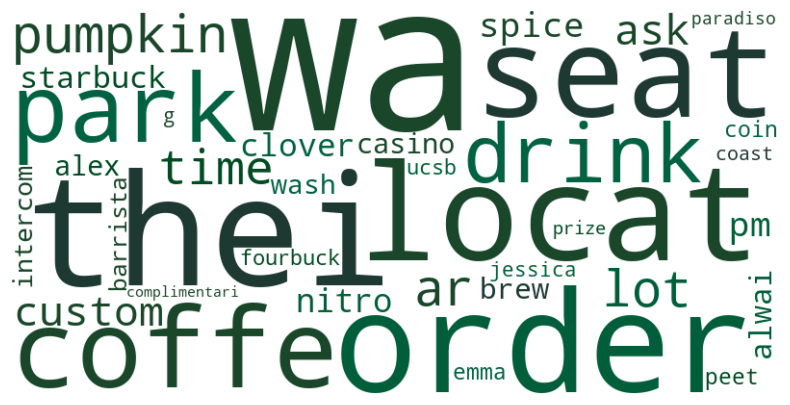

In [ ]:
# code with the help of ChatGPT
from itertools import chain
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

pdf_topics_with_words = df_topics_with_words.toPandas()

word_freq = {}
for index, row in pdf_topics_with_words.iterrows():
    words = row['terms']
    weights = row['termWeights']
    for word, weight in zip(words, weights):
        if word in word_freq:
            word_freq[word] += weight
        else:
            word_freq[word] = weight


def starbucks_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    colors = ['#006241', '#1e3932', '#004b23', '#1a472a', '#005e3a']
    return colors[random_state.randint(0, len(colors)-1)]

wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=starbucks_color_func, random_state=3).generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Using the wordcloud, we can help businesses to identify what products or services are frequently commemted. For instance, we would suggest Starbucks to pay more attention to reviews on products such as 'pumpkin spice' and 'nitro brew' as well as services such as 'peet', 'park', and 'seat'

### Tip

Now, we apply topic modeling to the tip data to help business like Starbucks to identify aspects of their services that needed to be improved

In [ ]:
# remove special characters
df_tip = df_tip.withColumn('text_clean', regexp_replace(df_tip['text'], '\n', ''))
df_tip = df_tip.withColumn('text_clean', regexp_replace(df_tip['text_clean'], '[^\w\s?!]', ''))
df_tip.select('text', 'text_clean').limit(10).toPandas()

,text,text_clean
0,Avengers time with the ladies.,Avengers time with the ladies
1,They have lots of good deserts and tasty cuban sandwiches,They have lots of good deserts and tasty cuban sandwiches
2,It's open even when you think it isn't,Its open even when you think it isnt
3,Very decent fried chicken,Very decent fried chicken
4,Appetizers.. platter special for lunch,Appetizers platter special for lunch
5,"Chili Cup + Single Cheeseburger with onion, pickle, and relish + Vanilla Coca-Cola...so far.",Chili Cup Single Cheeseburger with onion pickle and relish Vanilla CocaColaso far
6,"Saturday, Dec 7th 2013, ride Patco's Silver Sleigh w/ Santa & his elves on a decorated train into Center City. Trains leave from Lindenwold at 10am, 11:15am, & 12:30pm, and make all stops. Great for kids!",Saturday Dec 7th 2013 ride Patcos Silver Sleigh w Santa his elves on a decorated train into Center City Trains leave from Lindenwold at 10am 1115am 1230pm and make all stops Great for kids!
7,This is probably the best place in the cool Springs area to watch a game and eat,This is probably the best place in the cool Springs area to watch a game and eat
8,Tacos,Tacos
9,Starbucks substitute in boring downtown Tampa. Ugh. Never again!,Starbucks substitute in boring downtown Tampa Ugh Never again!


In [ ]:
df_tip.createOrReplaceTempView('df_tip')
df_business.createOrReplaceTempView('df_business')

df_tip_starbucks = spark.sql("""
select
*
from df_tip
where business_id in (
    select
    business_id
    from df_business
    where name = 'Starbucks'
)
""")

df_tip_starbucks.createOrReplaceTempView('df_tip_starbucks')
df_tip_starbucks.show(10)

+--------------------+----------------+-------------------+--------------------+--------------------+--------------------+
|         business_id|compliment_count|               date|                text|             user_id|          text_clean|
+--------------------+----------------+-------------------+--------------------+--------------------+--------------------+
|iFunuVzrg10UesZvM...|               0|2016-12-09 23:52:17|Great customer se...|_sxfMOKphtb9S_4tq...|Great customer se...|
|wWoX5l58K8YTokEWR...|               0|2013-08-24 00:34:35|Never have a bad ...|ALNUwFXAHXmFeQ9V2...|Never have a bad ...|
|zXvjFr3lftIlkuFNl...|               0|2013-05-19 21:49:44|Sundays in the su...|IFhqsrhESIC66b3IC...|Sundays in the su...|
|Flu8zFsJbX-mRw2yO...|               0|2011-12-26 19:52:54|Small place.  The...|Y-HpR79F_ZqRtGMjZ...|Small place  They...|
|mNO9pUXwxP2VgOhXI...|               0|2012-07-28 20:30:03|Wear your winter ...|PWdye8-VRbkTtKP8o...|Wear your winter ...|
|2sGHOKjHl5S0iqR

In [ ]:
# Apply the Pipeline
model_tip = pipeline.fit(df_tip_starbucks)
transformed = model_tip.transform(df_tip_starbucks)

In [ ]:
# code with the help of ChatGPT
topics = model_tip.stages[-1].describeTopics(maxTermsPerTopic=5)
cv_model = model_tip.stages[6]

# Retrieve the vocabulary from the model
vocab = cv_model.vocabulary

# Function to convert index to words using the vocabulary
def index_to_word(topic_df):
    # Maps each topic's indices to actual words using the vocabulary
    return topic_df.rdd.map(lambda row: (row['topic'], [vocab[idx] for idx in row['termIndices']], row['termWeights'])).toDF(["topic", "terms", "termWeights"])

# Apply the function to convert indices to words
df_topics_with_words = index_to_word(topics)
df_topics_with_words.show(truncate=False)

+-----+-------------------------------------+--------------------------------------------------------------------------------------------------------------+
|topic|terms                                |termWeights                                                                                                   |
+-----+-------------------------------------+--------------------------------------------------------------------------------------------------------------+
|0    |[thei, drink, grand, got, better]    |[0.009306542802348343, 0.007995203223349092, 0.007754182734491167, 0.0076075584398437, 0.007208428655804603]  |
|1    |[tea, green, ic, front, check]       |[0.025140672714943933, 0.01554511737502609, 0.0106250949184845, 0.006712227303110928, 0.006473442996444331]   |
|2    |[come, line, dont, go, long]         |[0.010281933036728917, 0.010215833952510703, 0.009580388276239717, 0.009462997273008302, 0.008083141339442306]|
|3    |[caramel, wifi, cant, start, someth] |[0.0114345536

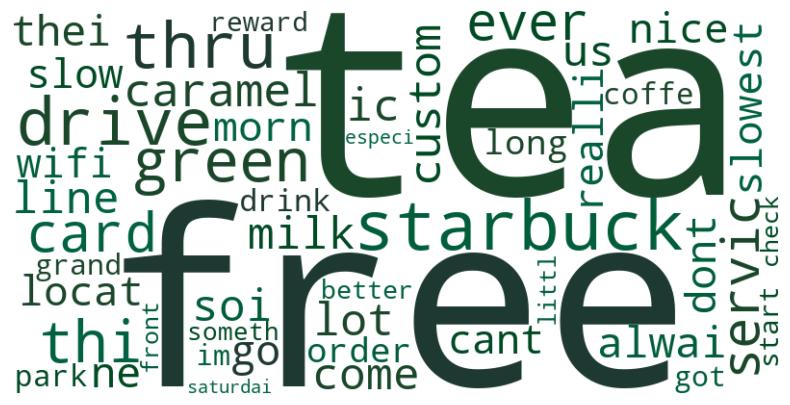

In [ ]:
# code with the help of ChatGPT
from itertools import chain
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

pdf_topics_with_words = df_topics_with_words.toPandas()

word_freq = {}
for index, row in pdf_topics_with_words.iterrows():
    words = row['terms']
    weights = row['termWeights']
    for word, weight in zip(words, weights):
        if word in word_freq:
            word_freq[word] += weight
        else:
            word_freq[word] = weight


def starbucks_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    colors = ['#006241', '#1e3932', '#004b23', '#1a472a', '#005e3a']
    return colors[random_state.randint(0, len(colors)-1)]

wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=starbucks_color_func, random_state=3).generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

From the worldcould, we can identify aspects of services such as 'park', 'slow', 'wifi', 'tea', 'free', etc. Based on these tips, we can help Starbucks to develop business strategies such as improving app ordering services or hiring more employees to faster the orders; provding better wifi services and lauch marketing activities such as 'buy one get one free' to keep and attract customers

## Sentiment Analysis

https://sparknlp.org/2021/01/15/sentimentdl_use_imdb_en.html

Precise sentiment analysis plays a crucial part in helping business refining their services. However, it is quite a challenge to train a well functional deep learning model from strach since we have 7 million reviews and limited computational power as well as hardware. Therefore, using a pre-trained model is a commercial and feasible resoluation.

The pre-trained model we used was 'sentimentdl_use_imdb' from Spark NLP that is trained on classifying IMDB reviews in negative, positive, and neutral categories using `Universal Sentence Encoder`. Reason for choosing this model is because the length and tone of IBDM reviews are very similar to Yelp reviews

In [ ]:
# code is modified based on: https://colab.research.google.com/github/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/streamlit_notebooks/SENTIMENT_EN.ipynb
from sparknlp.annotator import SentimentDLModel, UniversalSentenceEncoder
from sparknlp.base import DocumentAssembler
from pyspark.ml import Pipeline
from pyspark.sql.types import StringType
import pyspark.sql.functions as F

documentAssembler = DocumentAssembler()\
    .setInputCol("text_clean")\
    .setOutputCol("document")

use = UniversalSentenceEncoder.pretrained(name="tfhub_use", lang="en")\
 .setInputCols(["document"])\
 .setOutputCol("sentence_embeddings")


sentimentdl = SentimentDLModel.pretrained(name='sentimentdl_use_imdb', lang="en")\
    .setInputCols(["sentence_embeddings"])\
    .setOutputCol("sentiment")

nlpPipeline = Pipeline(
    stages = [
        documentAssembler,
        use,
        sentimentdl
        ])

result = nlpPipeline.fit(df_review).transform(df_review)

result.select(F.explode(F.arrays_zip(result.document.result,
                                     result.sentiment.result)).alias("cols")) \
      .select(F.expr("cols['0']").alias("document"),
              F.expr("cols['1']").alias("sentiment")).limit(10).toPandas()

tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]
sentimentdl_use_imdb download started this may take some time.
Approximate size to download 12 MB
[OK!]


,document,sentiment
0,If you decide to eat here just be aware it is going to take about 2 hours from beginning to end We have tried it multiple times because I want to like it! I have been to its other locations in NJ and never had a bad experience The food is good but it takes a very long time to come out The waitstaff is very young but usually pleasant We have just had too many experiences where we spent way too long waiting We usually opt for another diner or restaurant on the weekends in order to be done quicker,pos
1,Ive taken a lot of spin classes over the years and nothing compares to the classes at Body Cycle From the nice clean space and amazing bikes to the welcoming and motivating instructors every class is a top notch work outFor anyone who struggles to fit workouts in the online scheduling system makes it easy to plan ahead and theres no need to line up way in advanced like many gyms make you doThere is no way I can write this review without giving Russell the owner of Body Cycle a shout out Russells passion for fitness and cycling is so evident as is his desire for all of his clients to succeed He is always dropping in to classes to check inprovide encouragement and is open to ideas and recommendations from anyone Russell always wears a smile on his face even when hes kicking your butt in class!,pos
2,Family diner Had the buffet Eclectic assortment a large chicken leg fried jalapeo tamale two rolled grape leaves fresh melon All good Lots of Mexican choices there Also has a menu with breakfast served all day long Friendly attentive staff Good place for a casual relaxed meal with no expectations Next to the Clarion Hotel,pos
3,Wow! Yummy different delicious Our favorite is the lamb curry and korma With 10 different kinds of naan!!! Dont let the outside deter you because we almost changed our mindsgo in and try something new! Youll be glad you did!,pos
4,Cute interior and owner ? gave us tour of upcoming patiorooftop area which will be great on beautiful days like today Cheese curds were very good and very filling Really like that sandwiches come w salad esp after eating too many curds! Had the onion gruyere tomato sandwich Wasnt too much cheese which I liked Needed something elsepepper jelly maybe Would like to see more menu options added such as salads w fun cheeses Lots of beer and wine as well as limited cocktails Next time I will try one of the draft wines,pos
5,I am a long term frequent customer of this establishment I just went in to order take out 3 apps and was told theyre too busy to do it Really? The place is maybe half full at best Does your dick reach your ass? Yes? Go fuck yourself! Im a frequent customer AND great tipper Glad that Kanella just opened NEVER going back to dmitris!,neg
6,Loved this tour! I grabbed a groupon and the price was great It was the perfect way to explore New Orleans for someone whod never been there before and didnt know a lot about the history of the city Our tour guide had tons of interesting tidbits about the city and I really enjoyed the experience Highly recommended tour I actually thought we were just going to tour through the cemetery but she took us around the French Quarter for the first hour and the cemetery for the second half of the tour Youll meet up in front of a grocery store seems strange at first but its not terribly hard to find and itll give you a chance to get some water and youll stop at a visitor center part way through the tour for a bathroom break if needed This tour was one of my favorite parts of my trip!,pos
7,Amazingly amazing wings and homemade bleu cheese Had the ribeye tender perfectly prepared delicious Nice selection of craft beers Would DEFINITELY recommend checking out this hidden gem,pos
8,This easter instead of going to Lopez Lake we went to Los Padres National Forest which is really pretty but if you go to white rock the staff needs to cut down all the dead grass that invades the rock and the water I would wish the staff would also clean or

In [ ]:
result.printSchema()

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)
 |-- text_clean: string (nullable = true)
 |-- document: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- annotatorType: string (nullable = true)
 |    |    |-- begin: integer (nullable = false)
 |    |    |-- end: integer (nullable = false)
 |    |    |-- result: string (nullable = true)
 |    |    |-- metadata: map (nullable = true)
 |    |    |    |-- key: string
 |    |    |    |-- value: string (valueContainsNull = true)
 |    |    |-- embeddings: array (nullable = true)
 |    |    |    |-- element: float (containsNull = false)
 |-- sentence_embeddings: array (nullable = true)
 |    |-- element: struct (cont

### Export Result

To faciliate analysis after applying the pre-trained model, we choose to export the review data with sentiment label in parquet format

In [ ]:
from pyspark.sql.functions import col, explode

# sentiment_df = result.withColumn("sentiment_result", explode(col("sentiment.result")))
# sentiment_df = sentiment_df.drop('sentiment', 'document', 'sentence_embeddings')
# sentiment_df.write.mode("append").parquet(path+'yelp_academic_dataset_review_with_sentiment.parquet')

### Analysis

Having labelled review data ready, we can now utilize the sentiment to perform further analysis

In [1]:
path = "gs://ba-843-olaf/notebooks/jupyter/yelp_dataset/"
df_review_sentiment = spark.read.parquet(path+'yelp_academic_dataset_review_with_sentiment.parquet')
df_review_sentiment.limit(2).toPandas()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,text_clean,sentiment_result
0,XQfwVwDr-v0ZS3_CbbE5Xw,0,2018-07-07 22:09:11,0,KU_O5udG6zpxOg-VcAEodg,3.0,"If you decide to eat here, just be aware it is...",0,mh_-eMZ6K5RLWhZyISBhwA,If you decide to eat here just be aware it is ...,pos
1,7ATYjTIgM3jUlt4UM3IypQ,1,2012-01-03 15:28:18,0,BiTunyQ73aT9WBnpR9DZGw,5.0,I've taken a lot of spin classes over the year...,1,OyoGAe7OKpv6SyGZT5g77Q,Ive taken a lot of spin classes over the years...,pos


In [ ]:
df_review_sentiment.count()

6990125

First, we want to see the how many reviews fall into each category of the sentiment.

In [3]:
df_review_sentiment.createOrReplaceTempView('df_review_sentiment')

df_result = spark.sql("""
select
sentiment_result,
count(sentiment_result)
from df_review_sentiment
group by sentiment_result
""").toPandas()
df_result

,sentiment_result,count(sentiment_result)
0,pos,5301275
1,neg,1649715
2,neutral,39135


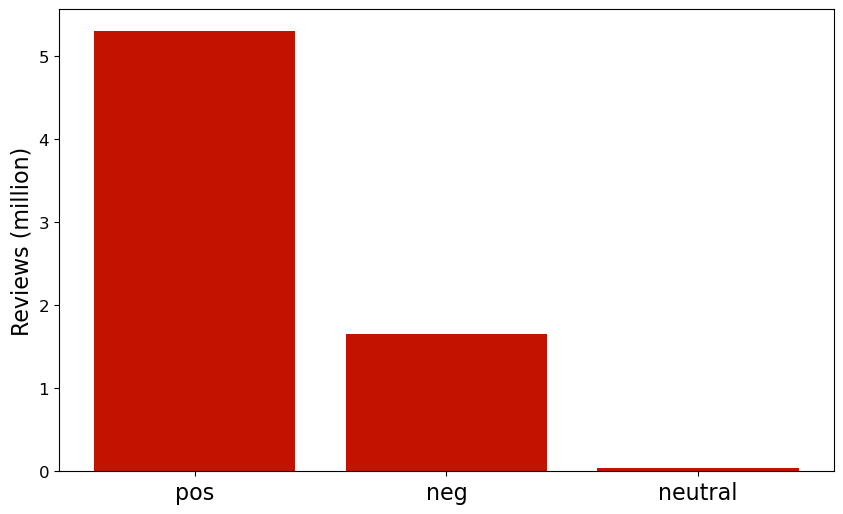

In [6]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

class CustomFormatter(ScalarFormatter):
    def __init__(self, useOffset=False, useMathText=False, useLocale=None):
        super().__init__(useOffset, useMathText, useLocale)
    
    def get_offset(self):
        return ''
    
plt.figure(figsize=(10, 6))
plt.bar(df_result['sentiment_result'], df_result['count(sentiment_result)'], color='#c41200')
y_formatter = CustomFormatter()
plt.gca().yaxis.set_major_formatter(y_formatter)
plt.ylabel('Reviews (million)', fontsize=16)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=12)
plt.show()

- Predominant reviews are positive
- negative reviews are about 1/3 of positive reviews
- neutral reviews are very uncommon

Now, we want to investigate into the relationship between stars and sentiment

In [5]:
df_pos=spark.sql("""
select
stars,
count(stars)
from df_review_sentiment
where sentiment_result = 'pos'
group by stars
order by stars
""").toPandas()
df_pos

,stars,count(stars)
0,1.0,180668
1,2.0,191785
2,3.0,460199
3,4.0,1340952
4,5.0,3127671


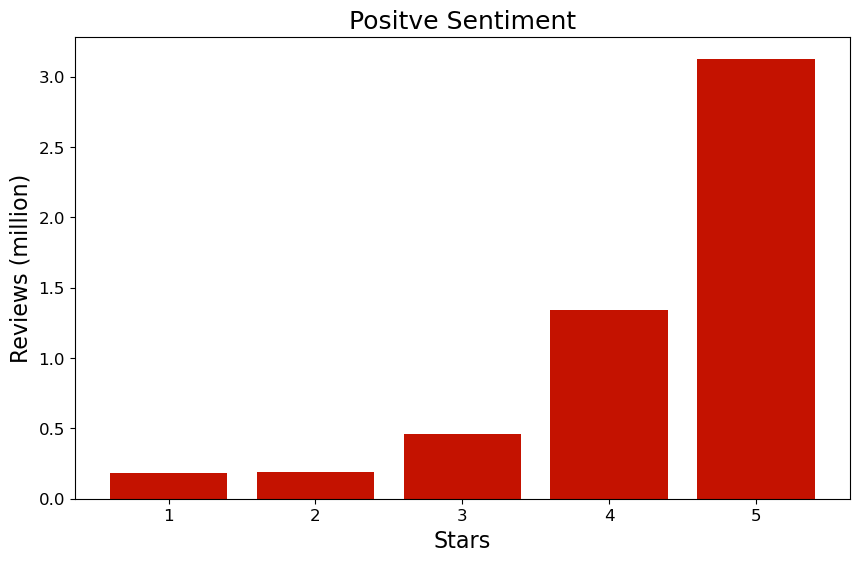

In [6]:
class CustomFormatter(ScalarFormatter):
    def __init__(self, useOffset=False, useMathText=False, useLocale=None):
        super().__init__(useOffset, useMathText, useLocale)
    
    def get_offset(self):
        return ''
    
plt.figure(figsize=(10, 6))
plt.bar(df_pos['stars'], df_pos['count(stars)'], color='#c41200')
y_formatter = CustomFormatter()
plt.gca().yaxis.set_major_formatter(y_formatter)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.ylabel('Reviews (million)', fontsize=16)
plt.xlabel('Stars', fontsize=16)
plt.title('Positve Sentiment', fontsize=18)
plt.show()

Like what we have expected, customers that gives positive reviews are very likely to give high stars(4 or 5). However, lower stars can still be given to the business since sentiment only represents a general emotional tendency. For instance, let's take a look at the following review:

'If you decide to eat here just be aware it is going to take about 2 hours from beginning to end We have tried it multiple times because I want to like it! I have been to its other locations in NJ and never had a bad experience The food is good but it takes a very long time to come out The waitstaff is very young but usually pleasant We have just had too many experiences where we spent way too long waiting We usually opt for another diner or restaurant on the weekends in order to be done quicker'.

The customer gave 3 stars and wrote a positive review. Obviously, there is disatisfication (the customer complaining about long waiting time) in the review, and positive sentiment is assigned by the model since compliments (food is delicious) outweights disatisfication. Therefore, although positive reviews often corresponds to high stars, positive reviews with low stars are where valuable insights for service improvement can be generated.


In [7]:
df_neg=spark.sql("""
select
stars,
count(stars)
from df_review_sentiment
where sentiment_result = 'neg'
group by stars
order by stars
""").toPandas()
df_neg

,stars,count(stars)
0,1.0,878356
1,2.0,344593
2,3.0,222819
3,4.0,105674
4,5.0,98273


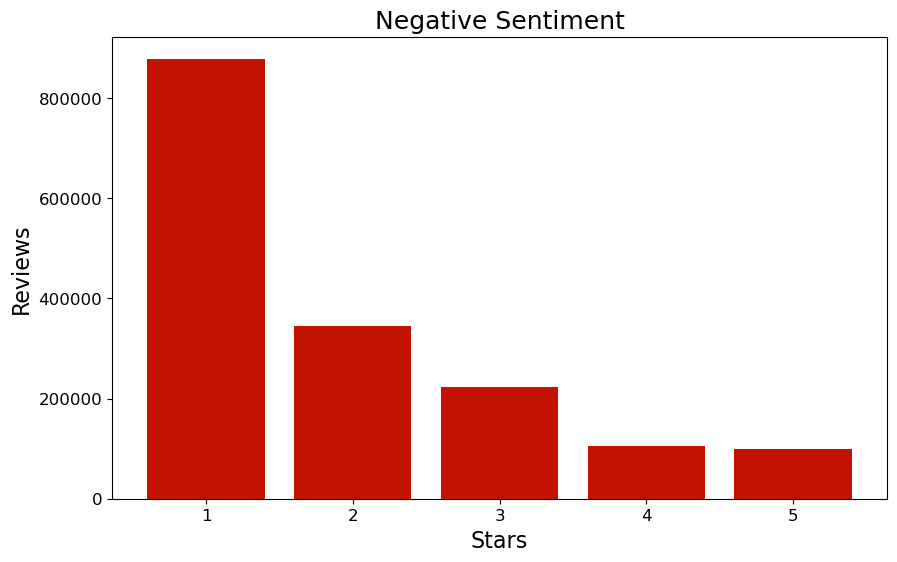

In [8]:
plt.figure(figsize=(10, 6))
plt.bar(df_neg['stars'], df_neg['count(stars)'], color='#c41200')
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.ylabel('Reviews', fontsize=16)
plt.xlabel('Stars', fontsize=16)
plt.title('Negative Sentiment', fontsize=18)
plt.show()

Likewise, negative sentiment, in general, corresponds to low stars

In [4]:
df_neutral=spark.sql("""
select
stars,
count(stars)
from df_review_sentiment
where sentiment_result = 'neutral'
group by stars
order by stars
""").toPandas()

df_neutral

,stars,count(stars)
0,1.0,10516
1,2.0,7854
2,3.0,8892
3,4.0,6245
4,5.0,5628


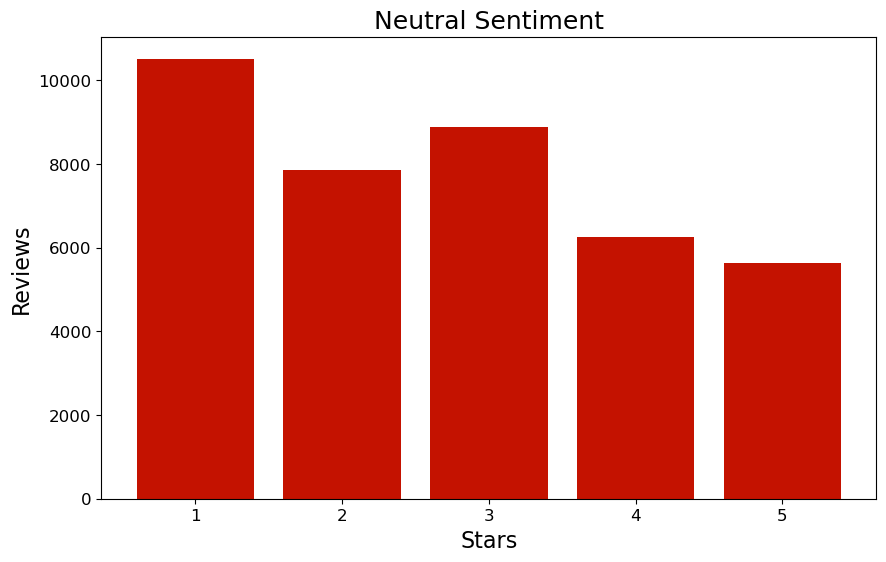

In [7]:
plt.figure(figsize=(10, 6))
plt.bar(df_neutral['stars'], df_neutral['count(stars)'], color='#c41200')
plt.xlabel('Stars')
plt.ylabel('Reviews', fontsize=16)
plt.xlabel('Stars', fontsize=16)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.title('Neutral Sentiment', fontsize=18)
plt.show()

The stars given are more evenly distributed for neutral reviews.

From the stars distribution based on sentiment categories, we can verify that the pre-trained model gives very accurate sentiment labels. However, the model has a 0.85 accuracy, which means it can make mistakes as well